In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
csvpath = 'Filtered Data/combo dataset.csv'
df = pd.read_csv(csvpath)

In [13]:
df.head()

,country,Years,Fertility Rate,Income
0,Afghanistan,1900,7.0,1110
1,Afghanistan,1901,7.0,1120
2,Afghanistan,1902,7.0,1140
3,Afghanistan,1903,7.0,1160
4,Afghanistan,1904,7.0,1180


In [46]:
us_df=df.loc[(df['country']=='United States')]
us_df=us_df.loc[(us_df['Income']!= 0)]
us_df

,country,Years,Fertility Rate,Income
3600,United States,1900,3.85,6820
3601,United States,1901,3.84,6760
3602,United States,1902,3.83,6960
3603,United States,1903,3.79,6740
3604,United States,1904,3.75,7090
...,...,...,...,...
3735,United States,2035,1.91,73800
3736,United States,2036,1.91,75300
3737,United States,2037,1.91,76800
3738,United States,2038,1.91,78400


In [58]:
X = us_df[["Years","Income"]]
y = us_df["Fertility Rate"].values.reshape(-1, 1)
print(X.shape, y.shape)

(140, 2) (140, 1)


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [65]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5831207654639661
Testing Score: 0.6533646279608578


Text(0.5, 1.0, 'MSE Plot')

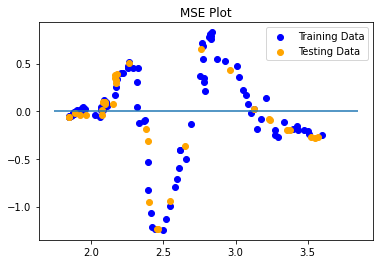

In [68]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("MSE Plot")